NotImplementedError: iLocation based boolean indexing on an integer type is not available

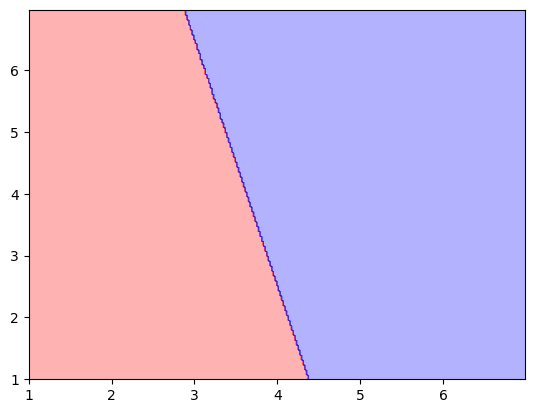

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def perceptron(X: pd.DataFrame, y: pd.Series, NUM_EPOCH: int = 1000, learning_rate: float = 0.01) -> np.ndarray:
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0
    
    # Convert y to -1 and 1
    y = y.apply(lambda x: 1 if x == 1 else -1)
    
    for epoch in range(NUM_EPOCH):
        for i in range(X.shape[0]):
            # Calculate the linear combination
            linear_combination = np.dot(X.iloc[i], weights) + bias
            
            # Apply the step function
            prediction = 1 if linear_combination > 0 else -1
            
            # Update weights and bias if the prediction is wrong
            if y.iloc[i] * prediction <= 0:
                weights += learning_rate * y.iloc[i] * X.iloc[i]
                bias += learning_rate * y.iloc[i]
    
    return weights, bias

def plot_decision_regions(X: pd.DataFrame, y: pd.Series, classifier, resolution: float = 0.02):
    # Set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Prepare the mesh grid
    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Flatten the grid arrays and combine them to get a matrix of points
    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    
    # Predict the class for each point in the mesh grid
    Z = np.array([classifier(np.array([xi, xj])) for xi, xj in grid_points])
    Z = Z.reshape(xx1.shape)
    
    # Plot the contour map
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot the data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X.iloc[y == cl, 0], 
                    y=X.iloc[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Generate a sample dataset
data = {
    'feature1': [2, 4, 4, 6],
    'feature2': [4, 2, 4, 6],
    'label': [0, 0, 1, 1]
}
df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = df['label']

# Train the Perceptron
weights, bias = perceptron(X, y, NUM_EPOCH=1000)

# Define the classifier function
def classifier(point):
    return 1 if np.dot(point, weights) + bias > 0 else 0

# Plot decision regions
plot_decision_regions(X, y, classifier=classifier)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Decision Regions')
plt.show()
